<a href="https://colab.research.google.com/github/tara618/symmetrical-octo-palm-tree/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import statistics
import sympy as sym
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

thyroid_data = pd.read_excel('./Data2.xlsx', sheet_name = 'thyroid0387_UCI')
thyroid_df = pd.DataFrame(thyroid_data)
print(thyroid_df.head())

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

In [6]:
print(thyroid_df.dtypes)

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [7]:
nom_var = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                     'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                     'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary','psych','TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured',
                     'referral source', 'Condition']


enc= pd.get_dummies(thyroid_data, columns = nom_var)
print(enc.head())

   Record ID  age  TSH   T3  TT4 T4U FTI TBG  sex_?  sex_F  ...  Condition_M  \
0  840801013   29  0.3    ?    ?   ?   ?   ?      0      1  ...            0   
1  840801014   29  1.6  1.9  128   ?   ?   ?      0      1  ...            0   
2  840801042   41    ?    ?    ?   ?   ?  11      0      1  ...            0   
3  840803046   36    ?    ?    ?   ?   ?  26      0      1  ...            0   
4  840803047   32    ?    ?    ?   ?   ?  36      0      1  ...            0   

   Condition_MI  Condition_MK  Condition_N  Condition_NO CONDITION  \
0             0             0            0                       1   
1             0             0            0                       1   
2             0             0            0                       1   
3             0             0            0                       1   
4             0             0            0                       0   

   Condition_O  Condition_P  Condition_Q  Condition_R  Condition_S  
0            0            0  

In [8]:
from sklearn.preprocessing import LabelEncoder
Label_enc = LabelEncoder()
ord_variables = ['age','TSH','T3','TT4', 'FTI','TBG']
label_enc_data = Label_enc.fit_transform(ord_variables)
print(label_enc_data)

[5 3 1 4 0 2]


In [9]:
thyroid_df.replace(['?',' '], np.nan, inplace=True)

thyroid_df.fillna(thyroid_df['TSH'].mean(), inplace=True)
thyroid_df.fillna(thyroid_df['T3'].mean(), inplace=True)
thyroid_df.fillna(thyroid_df['TT4'].mean(), inplace=True)
thyroid_df.fillna(thyroid_df['FTI'].mean(), inplace=True)
thyroid_df.fillna(thyroid_df['TBG'].mean(), inplace=True)

thyroid_df['TSH'] =thyroid_df['TSH'].astype(int)
thyroid_df['T3'] =thyroid_df['T3'].astype(int)
thyroid_df['TT4'] =thyroid_df['TT4'].astype(int)
thyroid_df['FTI'] =thyroid_df['FTI'].astype(int)
thyroid_df['TBG'] =thyroid_df['TBG'].astype(int)

thyroid_df.to_csv('clean_Thyroid_dataset.csv', index=False)
print(thyroid_df.head())

numerical_columns = ['age','TSH','T3','TT4','T4U','FTI','TBG']

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured       T4U FTI measured FTI TBG measured TBG  \
0            f    6            f  6.559638            f   6            f   6   
1         

In [10]:
print("The range of age is :",max(thyroid_df['age'])-min(thyroid_df['age']))
print("The range of TSH is :",max(thyroid_df['TSH'])-min(thyroid_df['TSH']))
print("The range of T3 is :",max(thyroid_df['T3'])-min(thyroid_df['T3']))
print("The range of TT4 is :",max(thyroid_df['TT4'])-min(thyroid_df['TT4']))
print("The range of FTI is :",max(thyroid_df['FTI'])-min(thyroid_df['FTI']))
print("The range of TBG is :",max(thyroid_df['TBG'])-min(thyroid_df['TBG']))

The range of age is : 96
The range of TSH is : 430
The range of T3 is : 8
The range of TT4 is : 356
The range of FTI is : 837
The range of TBG is : 47


     Record ID  age sex on thyroxine query on thyroxine  \
0    840801013   29   F            f                  f   
1    840801014   29   F            f                  f   
2    840801042   41   F            f                  f   
3    840803046   36   F            f                  f   
4    840803047   32   F            f                  f   
..         ...  ...  ..          ...                ...   
983  841030005   89   F            t                  f   
991  841030049   62   F            f                  f   
996  841031010   41   F            f                  f   
997  841031030   20   F            f                  f   
998  841031031   20   F            f                  f   

    on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                           f    f        f               f              f   
1                           f    f        f               f              f   
2                           f    f        f              

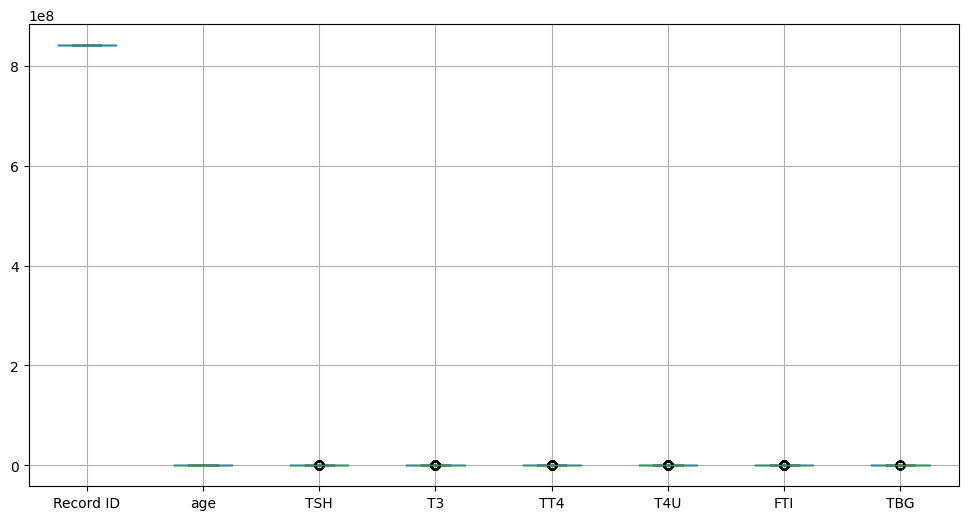

In [11]:
numeric_columns = thyroid_df.select_dtypes(include=['float64', 'int64'])

numeric_columns.boxplot(figsize=(12, 6))

Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 -1.5*IQR
upper_bound = Q3 + 1.5*IQR


outliers = ((numeric_columns <lower_bound) | (numeric_columns>upper_bound)).any(axis=1)

outlier_row = thyroid_df[outliers]
print(outlier_row)

In [12]:
print("The Mean of age is :",thyroid_df['age'].mean(),"and Variance is :",thyroid_df['age'].var())
print("The Mean of TSH is :",thyroid_df['TSH'].mean(),"and Variance is :",thyroid_df['TSH'].var())
print("The Mean of T3 is :",thyroid_df['T3'].mean(),"and Variance is :",thyroid_df['T3'].var())
print("The Mean of TT4 is :",thyroid_df['TT4'].mean(),"and Variance is :",thyroid_df['TT4'].var())
print("The Mean of FTI is :",thyroid_df['FTI'].mean(),"and Variance is :",thyroid_df['FTI'].var())
print("The Mean of TBG is :",thyroid_df['TBG'].mean(),"and Variance is :",thyroid_df['TBG'].var())

The Mean of age is : 51.509 and Variance is : 352.5584774774775
The Mean of TSH is : 6.21 and Variance is : 768.5444444444444
The Mean of T3 is : 2.309 and Variance is : 4.035554554554555
The Mean of TT4 is : 102.427 and Variance is : 2057.866537537537
The Mean of FTI is : 103.955 and Variance is : 4501.49446946947
The Mean of TBG is : 6.728 and Variance is : 16.50051651651652


In [14]:
from sklearn.preprocessing import MinMaxScaler
numerical_attributes = ['age', 'TT4']

scaler = MinMaxScaler()

thyroid_df[numerical_attributes] = scaler.fit_transform(thyroid_df[numerical_attributes])
print(thyroid_df)

     Record ID       age sex on thyroxine query on thyroxine  \
0    840801013  0.291667   F            f                  f   
1    840801014  0.291667   F            f                  f   
2    840801042  0.416667   F            f                  f   
3    840803046  0.364583   F            f                  f   
4    840803047  0.322917   F            f                  f   
..         ...       ...  ..          ...                ...   
995  841031002  0.416667   F            f                  f   
996  841031010  0.416667   F            f                  f   
997  841031030  0.197917   F            f                  f   
998  841031031  0.197917   F            f                  f   
999  841031032  0.750000   F            f                  f   

    on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                           f    f        f               f              f   
1                           f    f        f               f              f 

In [15]:
Data = pd.read_csv('/content/clean_Thyroid_dataset.csv')

vec1 = Data.iloc[0]
vec2 = Data.iloc[1]

def jaccard(v1, v2):
    intersection = sum((v1=='t') & (v2=='t'))
    union = sum((v1=='t') | (v2=='t'))
    return intersection/union

def Simple_Matching(v1, v2):
    match = sum(v1==v2)
    total = len(v1)
    return match/total

Jaccard_cof = jaccard(vec1, vec2)
sm_cof = Simple_Matching(vec1, vec2)

print(f'Jaccard Cofficient (JC) is :{Jaccard_cof}')
print(f'Simple Matching Coff (SMC) is :{sm_cof}')

if(Jaccard_cof > sm_cof):
    print('The Jaccard cofficient is more appropriate for measuring Similarity')
elif sm_cof > Jaccard_cof:
     print('The Simple Matching cofficient is more appropriate for measuring Similarity')
else:
     print('The Jaccard cofficient and Simple Matching Coff are equally appropriate for measuring Similarity')

Jaccard Cofficient (JC) is :0.25
Simple Matching Coff (SMC) is :0.7741935483870968
The Simple Matching cofficient is more appropriate for measuring Similarity


In [16]:
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

new = ['age','TSH','T3','TT4','T4U','FTI','TBG']
VecArr1 = Data[new].iloc[0]
VecArr2 = Data[new].iloc[1]

vector1 = np.array(VecArr1)
vector2 = np.array(VecArr2)


cosine = np.dot(vector1,vector2)/(norm(vector1)*norm(vector2))

print("Cosine Similarity is :", cosine)

Cosine Similarity is : 0.4097328100024106


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


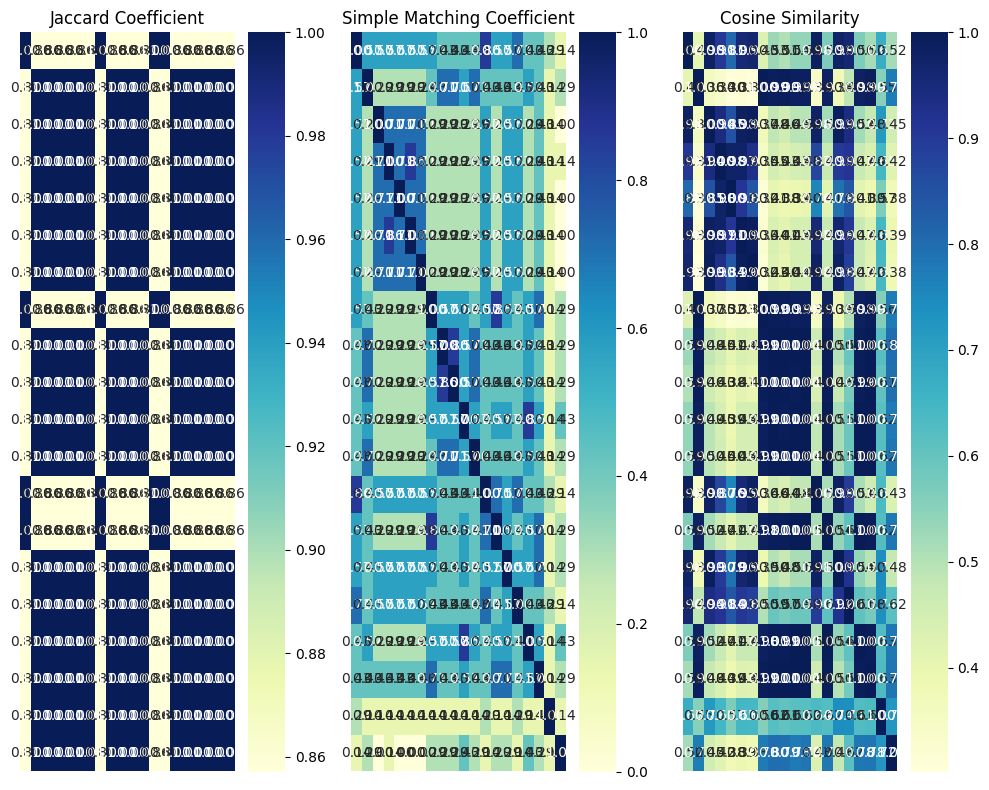

In [17]:
import numpy as np
from sklearn.metrics import jaccard_score, pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

new_data = ['age','TSH','T3','TT4','T4U','FTI','TBG']
vector = Data[new_data].iloc[:20]

data_arr = np.array(vector)

jcc_similarity = 1 - pairwise_distances(data_arr, metric="jaccard")

smc_similarity = 1 - pairwise_distances(data_arr, metric="hamming")

cosine_similarity = 1 - pairwise_distances(data_arr, metric="cosine")

plt.figure(figsize=(10, 8))

plt.subplot(131)
sns.heatmap(jcc_similarity, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient")

plt.subplot(132)
sns.heatmap(smc_similarity, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient")

plt.subplot(133)
sns.heatmap(cosine_similarity, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity")

plt.tight_layout()
plt.show()